In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from scipy import integrate
from sklearn.neighbors import KernelDensity
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import levene, mood, mannwhitneyu, ks_2samp, anderson_ksamp


sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [2]:
#    Задание 1
#Сотрудник службы оценки качества продукции заметил, что число бракованных листов стали в партии для стали марки A больше, чем для стали марки B. Также он обратил внимание, что при средней скорости прокатки более 4 м/с число бракованных листов больше. В соответствии с этими наблюдениями, предлагается снизить скорость прокатки и ввести дополнительные меры контроля качества для стали марки A.  
#Обоснуйте, что:
#    1) Более 3 бракованных листов на партию выходит значимо чаще для стали марки А, чем для стали марки B.
#    2) При скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию выходит значимо чаще, чем при меньших скоростях прокатки. 
#Данные, необходимые для анализа, содержатся в файле «Статистика за 2018 год». Количество листов стали в каждой партии предполагается одинаковым.

In [3]:
# Число бракованных листов, Скорость прокатки, Марка стали
df = pd.read_csv("статистика за 2018 год.csv")
s_types = np.unique(df["Марка стали"].values)

In [4]:
#########################
###      Task 1
#########################

[Text(0, 0.5, 'Quantity'), Text(0.5, 1.0, 'Number of defective metal sheets')]

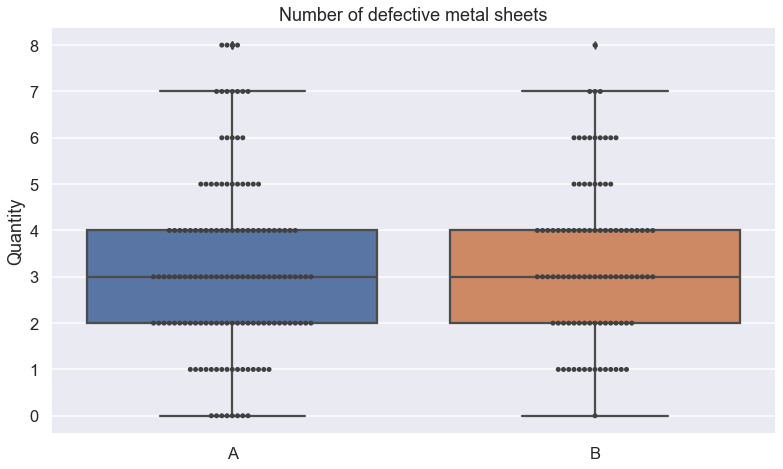

In [4]:
# Draw boxplots
x = df["Марка стали"].values
y = df["Число бракованных листов"].values
ax = sns.boxplot(x=x, y=y )
ax = sns.swarmplot(x=x, y=y, color=".25")
ax.set(title="Number of defective metal sheets", ylabel="Quantity")

Ризультат: рис.1

В качестве первичного осмотра данных для металлов категорий А и В построен график Box-plot с нанесенными поверх выборкой данных в виде точек. Ось Х: категории металлов (Сталь А, Сталь В); Ось Y: количество дефектов, [шт].

По данному графику видно, что средние значения приблизительно совпадают, как и их доверительные интервалы в целом, а также заметно, что Сталь марки А имеет скорее большее число бракованных листов стали в партии, чем для стали марки B.

Следующим этапом для проверки гипотезы (1) рассмотрим подробнее распределения каждой марки стали в отдельности, а также проведем частотный анализ выборок каждой марки.

In [5]:
# extract needed information about distributions
distrib_info = {}
for i in range(0, s_types.shape[0] ):
    s_type = s_types[i]
    sub_df = df[ df["Марка стали"] == s_type ]
    distrib_info[s_type+"_data"] = sub_df["Число бракованных листов"].values
    distrib_info[s_type+"_mean"] = np.mean( distrib_info[s_type+"_data"] )
    distrib_info[s_type+"_disp"] = np.var( distrib_info[s_type+"_data"] )
    distrib_info[s_type+"_data_standard"] = (distrib_info[s_type+"_data"] - distrib_info[s_type+"_mean"])/np.sqrt(distrib_info[s_type+"_disp"])

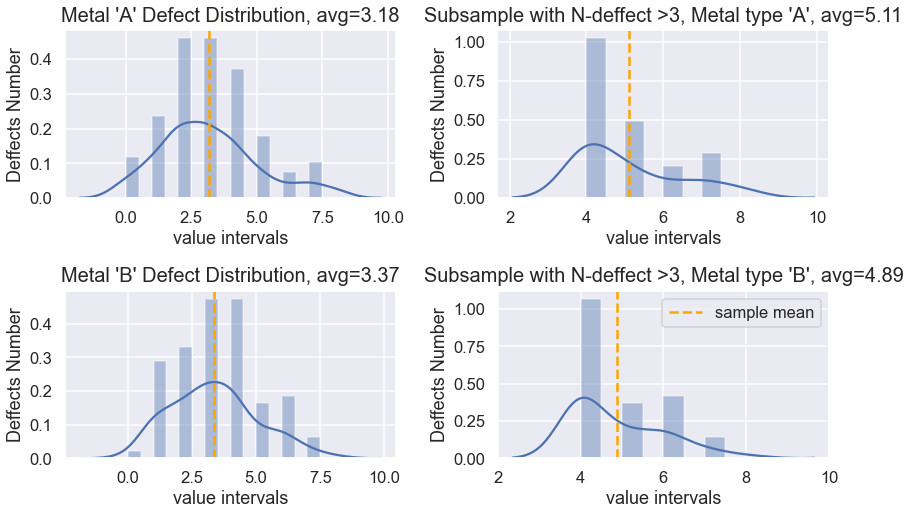

In [6]:
# draw distribution graphs
fig, ax_list = plt.subplots(nrows=2, ncols=2)
for i in range(0, s_types.shape[0] ):
    s_type = s_types[i]
    sub_df = df[ df["Марка стали"] == s_type ]
    n_blists = sub_df["Число бракованных листов"].values
    
    # hist & mean lvl
    hist = sns.distplot( n_blists, ax=ax_list[i,0], bins=np.arange(0, np.max(n_blists), 0.5 ) )#list(range(np.min(n_blists),np.max(12), 1)) )
    mean = np.round( np.mean(n_blists), 2)
    ax_list[i,0].axvline(x=mean, linestyle='--', linewidth=2.5, label="sample mean", c='orange')

    # legend
    ax_list[i,0].set_title("Metal '%s' Defect Distribution, avg=%s"%(s_type, mean), y=1.015, fontsize=20)
    ax_list[i,0].set_xlabel("value intervals")
    ax_list[i,0].set_ylabel("Deffects Number")

    # > 3 dffects:
    cond_sub_df = sub_df[ sub_df["Число бракованных листов"]>3 ]
    cond_n_blists = cond_sub_df["Число бракованных листов"].values
    hist = sns.distplot( cond_n_blists, ax=ax_list[i,1], bins=np.arange(3, np.max(n_blists), 0.5 ) )#, bins=list(range(3,np.max(12), 1)) )
    ax_list[i,1].set_xlabel("value intervals")
    ax_list[i,1].set_ylabel("Deffects Number")
    
    # mean lvl
    cond_mean = np.round( np.mean(cond_n_blists), 2)
    ax_list[i,1].axvline(x=cond_mean, linestyle='--', linewidth=2.5, label="sample mean", c='orange')
    ax_list[i,1].set_title("Subsample with N-deffect >3, Metal type '%s', avg=%s"%(s_type, cond_mean), y=1.015, fontsize=20)

plt.legend()
fig.tight_layout()

Результат: рис.2 

Гистограммы количества деффектов в партии для марки А и В (слева, а) и гистограммы количестве дефектов не более 3 в партии для марки А и В (справа, б) с нанесенным уровнем средних значений (желтая линия).


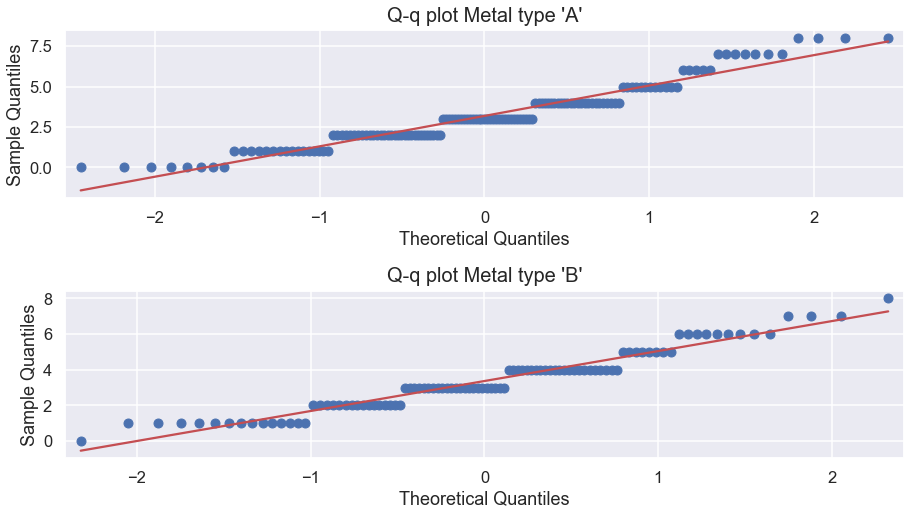

In [7]:
# q-q plot
fig, ax_list = plt.subplots(nrows=2, ncols=1)
for i in range(0, s_types.shape[0] ):
    s_type = s_types[i]
    qqplot(distrib_info[s_type+"_data"], line='s', ax=ax_list[i] )
    ax_list[i].set_title("Q-q plot Metal type '%s'"%(s_type), y=1.015, fontsize=20)

fig.tight_layout()

Ризультат: рис.3

Как видно - несмотря на то, что распределения имеет дискретный вид, А и В можно считать нормальным несмотря на наличие отклонений на концах выборок. В дальнейшем выполним дополнительную проверку на нормальность для распределений А и В.

In [8]:
# Normality distribution check
for i in range(0, s_types.shape[0] ):
    s_type = s_types[i]
    z_score, p_value = stats.normaltest(distrib_info[s_type+"_data"])
    distrib_info[s_type+"_normality"] = np.round(p_value, 4)

print("A-set normality check:", distrib_info["A_normality"] )
print("B-set normality check:", distrib_info["B_normality"] )

A-set normality check: 0.0152
B-set normality check: 0.2348


H0: распределение является нормальным

H1: распределение не является нормальным

Уровень значимости: 0.01

p-value A: 0.0152 > 0.01, гипотеза H0 не отвергается; значение отклонения от уровня значмисти невелико, но будем считать распределение нормальным, основываясь на графике Q-q-plot, рис.3;

p-value B: 0.2348 > 0.01, гипотеза H0 не отвергается; результат согласуется с графиком Q-q-plot, рис.3;



In [9]:

# check Avg
stat, pvalue_mw = mannwhitneyu( distrib_info["A_data"], distrib_info["B_data"], use_continuity=True, alternative=None)
print( "pvalue_mw=", np.round(pvalue_mw, 4) )

# check dispersion
stat, pvalue_Levene = levene( distrib_info["A_data"], distrib_info["B_data"], center="median" )
z, pvalue_Mood = mood( distrib_info["A_data"], distrib_info["B_data"], axis=0)
print( "pvalue Levene=", np.round(pvalue_Levene, 4) )
print( "pvalue Mood=", np.round(pvalue_Mood, 4) )

# check distribution uniformity
stat, pvalue_ks = ks_2samp( distrib_info["A_data"], distrib_info["B_data"], alternative='greater' )
print( "pvalue_ks=", np.round(pvalue_ks, 4) )


pvalue_mw= 0.149
pvalue Levene= 0.5017
pvalue Mood= 0.8805
pvalue_ks= 0.4539


В статистических тестах выполняем проверку гипотез о том, что:

[Avg] H0: средние значения равны, H1: средние значения не равны

[Disp] H0: дисперсии совпадают, H1: дисперсии не совпадают

[Unif] H0: A(x) = B(x), H1: A(x) <= B(x)

Уровень значимости: 0.05

Критерий Мана-Уитни: 0.149 > 0, [Avg] H0 не отвергается

Критерий (Левене, Мууда): (0.149, 0.8805), [Disp] H0 не отвергается двумя критериями

Критерий Колмогорова-Смирнова: 0.4539 > 0.05, [Unif] H0 не отвергается


Event freq. 'Number of defects <=3 per batch':	A:86 (61.87%)	B:54 (55.1%)
Event freq. 'Number of defects >3 per batch':	A:53 (38.13%)	B:44 (44.9%)
Batch number per year:	A:139	B:98


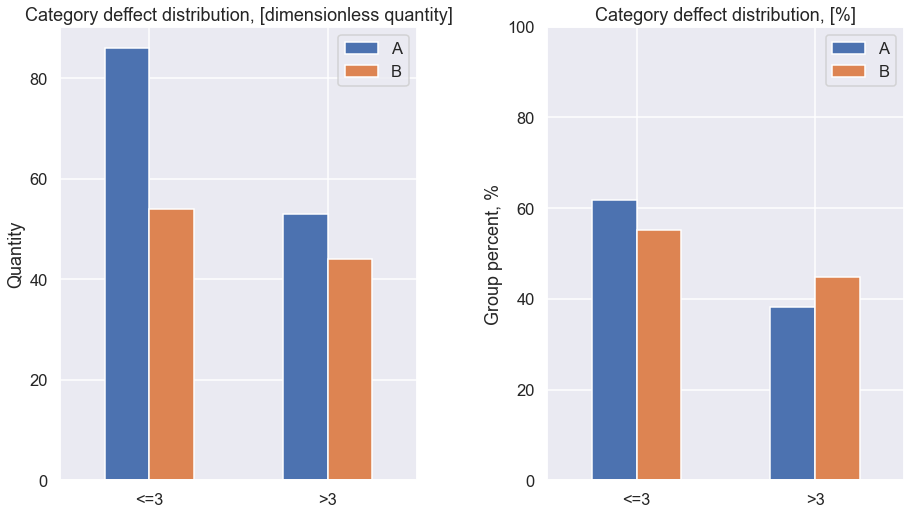

In [10]:
# histogram of elements <=3 & >3
g_res = {}
g_res_percentage = {}
for i in range(0, s_types.shape[0] ):
    s_type = s_types[i]
    sub_df = df[ df["Марка стали"] == s_type ]
    condition = sub_df["Число бракованных листов"]<=3
    true_false_res = condition.value_counts()
    g_res[s_type] = ( true_false_res.loc[True], true_false_res.loc[False] )
    g_res_percentage[s_type] = (
        true_false_res.loc[True]/condition.shape[0] *100,
        true_false_res.loc[False]/condition.shape[0] *100
    )
    #print( condition.shape[0], true_false_res.loc[True], true_false_res.loc[False] , sub_df.shape)

fig, ax_list = plt.subplots(nrows=1, ncols=2)
buf = pd.DataFrame( g_res, index=[ '<=3', '>3']  )
buf.plot.bar(rot=0, ax=ax_list[0])
ax_list[0].set_title("Category deffect distribution, [dimensionless quantity]")
ax_list[0].set_ylabel("Quantity")

buf = pd.DataFrame( g_res_percentage, index=[ '<=3', '>3']  )
a = buf.plot.bar(rot=0, ax=ax_list[1])
ax_list[1].set_title("Category deffect distribution, [%]")
ax_list[1].set_ylabel("Group percent, %")
ax_list[1].set_ylim(0, 100)

plt.legend()
fig.tight_layout()

print(
    "Event freq. 'Number of defects <=3 per batch':\tA:%s (%s%%)\tB:%s (%s%%)"%(
    g_res["A"][0], np.round(g_res_percentage["A"][0], 2),
    g_res["B"][0], np.round(g_res_percentage["B"][0], 2)
) )
print("Event freq. 'Number of defects >3 per batch':\tA:%s (%s%%)\tB:%s (%s%%)"%(
    g_res["A"][1], np.round(g_res_percentage["A"][1], 2),
    g_res["B"][1], np.round(g_res_percentage["B"][1], 2)
) )
print("Batch number per year:\tA:%s\tB:%s"%(
    g_res["A"][1]+g_res["A"][0],
    g_res["B"][1]+g_res["B"][0]
) )


Ризультат: рис.4

По графику частотного анализа "Category deffect distribution", в котором был выполнен расчет количества партий с браком не менее 3 деталей и расчет количества партий с браком более 3 деталей для металлов А и В видно, что при рассмотрение категории (">3", т.е. более 3х дефектов в партии) видно, что для марки А наблюдается гораздо больше дефектов в целом, чем для марки В. В частности, количество партий с браком более 3х пластин марки А больше, чем марки В.

Расчет количества деффектов для категорий "<=3" и ">3" для марок А и В и их процентное соотношение внутри каждой марки:

                А               В
    <=3:    86 (61.87%)	    54 (55.1%)
    >3:     53 (38.13%)     44 (44.9%)
    Total N:   139             98

График "Category deffect distribution" показывает общее соотношение категорий брака для обоих марок.

In [11]:
# Skew analysis
from scipy.stats import skew
skew_a = skew( distrib_info["A_data_standard"] )
skew_b = skew( distrib_info["B_data_standard"] )
print( "A-skew:", np.round(skew_a,4) )
print( "B-skew:", np.round(skew_b,4) )

A-skew: 0.6067
B-skew: 0.3916


Коэффициент асимметрии А превышает В при положительном смещении обоих распределений:

A-skew: 0.6067 > B-skew: 0.3916

Попробуем уточнить анализ, удалив зависимость количества бракованных листов от скорости прокатки конвеера.

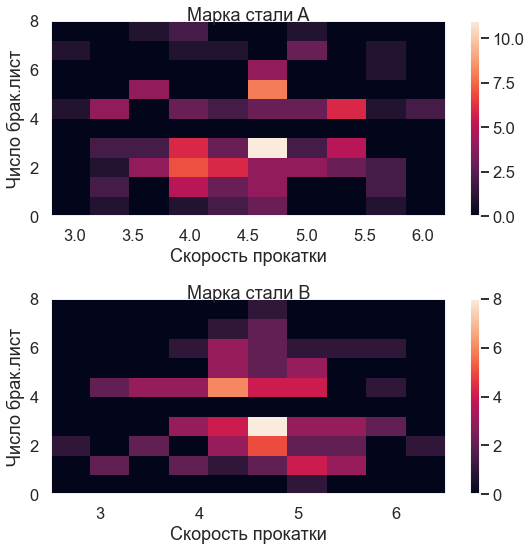

In [12]:
# Draw 2D histograms for: Numb_defects(Speed)
s_types = np.unique( df["Марка стали"] )
fig, ax_list = plt.subplots(nrows=2, ncols=1,figsize=(8,8))
for i in range(0, s_types.shape[0] ):
	s_type = s_types[i]
	sub_df = df[ df["Марка стали"] == s_type ]
	n_blists = sub_df["Число бракованных листов"].values
	speed = sub_df["Скорость прокатки"].values
    
	gplot = ax_list[i].hist2d(speed, n_blists)
	_ = ax_list[i].set_title( "Марка стали %s"%(s_type), pad=0 )
	_ = ax_list[i].set_xlabel("Скорость прокатки")
	_ = ax_list[i].set_ylabel("Число брак.лист")
	_ = plt.colorbar( gplot[3], ax=ax_list[i] )

fig.tight_layout()

Результат: Рис. 5, гистограмма зависимости числа бракованных листов марок А и В от скорости прокатки

На гистограмме видно, что при рассмотрении среза по скорости количество дефектов марки А превосходит В.  Фиксируем "степень свободы": будем рассматривать скорость равную 4 м\с (условно примем, что (3.5, 4.5) ~ 4 ), уровень значимости 0.05.

In [13]:
# select sample with for fixed speed for each A & B set
min_speed = 3.5
max_speed = 4.5
for i in range(0, s_types.shape[0] ):
    s_type = s_types[i]
    condition = (
        df["Марка стали"] == s_type) & (
        (df["Скорость прокатки"]>min_speed) &
        (df["Скорость прокатки"]<max_speed)
    )
    cond_sub_df = df[condition]
    distrib_info[s_type+"_data_fspeed"] = cond_sub_df["Число бракованных листов"].values
    distrib_info[s_type+"_mean_fspeed"] = np.mean( distrib_info[s_type+"_data_fspeed"] )
    distrib_info[s_type+"_disp_fspeed"] = np.var( distrib_info[s_type+"_data_fspeed"] )
    distrib_info[s_type+"_data_fspeed_standard"] =\
        (distrib_info[s_type+"_data_fspeed"] - distrib_info[s_type+"_mean_fspeed"])/\
        np.sqrt(distrib_info[s_type+"_disp_fspeed"])

In [14]:
# analysis with fixed speed=4
stat, pvalue_mw = mannwhitneyu(
    distrib_info["A_data_fspeed_standard"],
    distrib_info["B_data_fspeed_standard"],
    use_continuity=True,
    alternative=None
)
print("Mann-Whitney p-value=", np.round(pvalue_mw, 4) )

Mann-Whitney p-value= 0.4494


Критерий Мана-Уитни: 0.4494 > 0.05, гипотеза H0 не отвергается

Ключевые результаты:

1. При анализе согласно рис.2 (б) и частотному анализу рис.4 можно предположить, что марка А имеет больше партий с более 3 бракованнами деталями; средние значения по выбранным партиям с более 3 дефектами составляет 5.11 для марки А и 4.89 для марки В (отличие ~5%);

2. При анализе гистограммы зависимости числа бракованных листов марок А и В от скорости прокатки, рис.5, и фиксации скорости можно предположить, что при фиксировании скорости прокатки количество партий с браком в партии больше 3 у материала А больше, чем материала В;

3. Проведены статистические тесты:

3.1. Проверка раенства средних двух распределений - гипотеза не отвергнута при уровне значимости 0.05;

3.2. Проверка похожести дисперсии двух распределений - гипотеза не отвергнута при уровне значимости 0.05;

3.3. Првоерка гипотезы А(х)=В(х) - гипотеза не отвергнута при уровне значимости 0.05;

3.4. Проверка равенства двух распределений при фиксации одной из степеней свободы (фиксированная скорость ~4 м/с) - гипотеза не отвергнута при уровне значимости 0.05;

3.5. Коэффициент ассиметрии марок А и В поожителен, при этом А имеет более сильное смещение (0.6067 и 0.3916 соответственно);

На основании полученных результатов мы не можем быть уверены в том, что более 3 бракованных листов на паритию выходит знаимо чаще для стали марки А, чем для стали марки В. Для уточнения проверки, возможно было бы целесообразно: собрать больше данны для увеличения уровня доверия; проводить сбор данных для фиксированной скорости или малой её дисперсии для странения зависимости сведений о дефектах от скорости прокатки; по возможности осуществить сбор материалов с одинаковых или идентичных камер.

In [ ]:
#########################
###      Task 2
#########################

AxesSubplot(0.125,0.125;0.775x0.755)


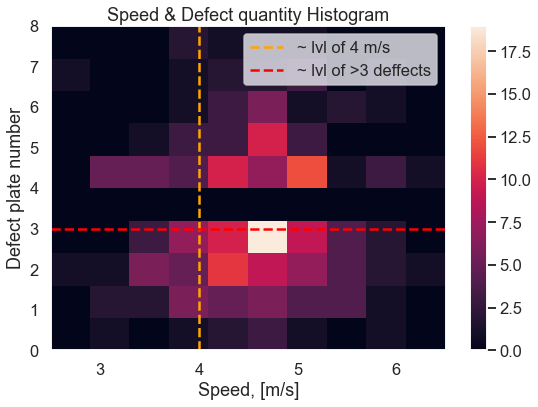

In [15]:
# Draw 2D histograms for: Numb_defects(Speed)
fig, ax_list = plt.subplots(nrows=1, ncols=1,figsize=(8,6))
print(ax_list)
n_blists = df["Число бракованных листов"].values
speed = df["Скорость прокатки"].values

gplot = ax_list.hist2d(speed, n_blists)
_ = ax_list.set_title( "Speed & Defect quantity Histogram", pad=0, y=1.015 )
_ = ax_list.set_xlabel("Speed, [m/s]")
_ = ax_list.set_ylabel("Defect plate number")
_ = plt.colorbar( gplot[3], ax=ax_list )


ax_list.axvline(x=4, linestyle='--', linewidth=2.5, label="~ lvl of 4 m/s", c='orange')
ax_list.axhline(y=3, linestyle='--', linewidth=2.5, label="~ lvl of >3 deffects", c='red')

plt.legend()
fig.tight_layout()

Результат: рис.6

Гистограмма зависимости Скорости прокатки в м\с от количества дефектов. Пунктирными линиями изображены уровень скорости 4м\с (желтая пунтктирная линия), уровень 3 деффектов в партии (красная пунктирная линия).

На гистограмме видно, что при скоростях выше 4 м\с количество случаев с более 3 дефектами в партии (верхний правый квадрант) случается чаще, чем при меньших скоростях (верхний левый квадрант).

In [16]:
# Correlation check for speed & Defect plane number
r_corr_pearson, p_value_pearson = stats.pearsonr( speed, n_blists )
r_corr_spearman, p_value_spearman = sp.stats.spearmanr( speed, n_blists )
print( "Pearson:\tr=%s\tp_value=%s"%( np.round(r_corr_pearson,4) , np.round(p_value_pearson,4) ) )
print( "Spearman:\tr=%s\tp_value=%s"%( np.round(r_corr_spearman,4) , np.round(p_value_spearman,4) ) )

Pearson:	r=0.0115	p_value=0.8605
Spearman:	r=0.0169	p_value=0.7956


Проверка корреляции между показетелями скорость прокатки и количества дефектов в партии проведена с помощью определения коэффициент Пирсона и с проверкой с помощью коэффициента Спирмана (уровнь значимости 0.05):

    Pearson:	r=0.0115	p_value=0.8605 => 0.86 > 0.05 => гипотеза H0 о наличии линейной коррелции не отвергается
    Spearman:	r=0.0169	p_value=0.7956 => 0.8 > 0.05 => гипотеза H0 о наличии монотонной зависимости не отвергается

Коэффициент коррелляции Пирсона (0.012) и Спирмена (0.017) свидетельствует о положительной корреляции (возрастающая зависимость) количества бракованных пластин в партии от скорости прокатки.

Данное утверждение согласуется с гистограммой, рис.6

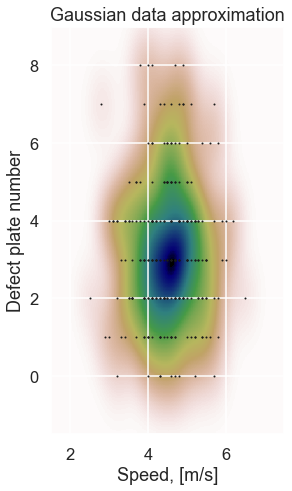

In [17]:
# gaussian data approximation
values = np.vstack([ list(speed), list(n_blists) ])
kernel = stats.gaussian_kde(values)
xmin = 1.5; xmax = speed.max()+1; ymin = -1.5; ymax = n_blists.max()+1;
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kernel(positions).T, X.shape)

fig, ax = plt.subplots()
ax.imshow( np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax] )
ax.plot(speed, n_blists, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_title( "Gaussian data approximation", pad=0, y=1.015 )
ax.set_xlabel("Speed, [m/s]")
ax.set_ylabel("Defect plate number")
plt.show()

Результат: рис. 7, визуализация данных с помощью аппроксимации распределение Гаусса

In [18]:
# count squares under distribution curves for selected areas LU, RU quadrant
def z_score(value, mean, std):
    return (value - mean)/std

def to_standard(distrib):
    mean = np.mean(distrib)
    std = np.std(distrib, ddof=1) 
    return (distrib - mean)/std, mean, std

n_blists = df["Число бракованных листов"].values
speed = df["Скорость прокатки"].values

# standartization
n_blist_stand, n_blist_mean, nblist_std = to_standard(n_blists)
speed_stand, speed_mean, speed_std = to_standard(speed)

lu_area = {
    #( low_bounds=[-np.inf, -np.inf], high_bounds=[4, 3] )
    "low_bounds": [-np.inf, -np.inf],
    "high_bounds": [z_score(4, speed_mean, speed_std), z_score(3, n_blist_mean, nblist_std)]
}
ru_area = {
    #( low_bounds=[4, 3], high_bounds=[np.inf, np.inf] )
    "low_bounds": [z_score(4, speed_mean, speed_std), z_score(3, n_blist_mean, nblist_std)],
    "high_bounds": [np.inf, np.inf]
}

#create integration kernel
values = np.vstack([ list(speed_stand), list(n_blist_stand) ])
kernel = stats.gaussian_kde(values)

# compute squares
p_value_lu = kernel.integrate_box( low_bounds=lu_area["low_bounds"], high_bounds=lu_area["high_bounds"] )
p_value_ru = kernel.integrate_box( low_bounds=ru_area["low_bounds"], high_bounds=ru_area["high_bounds"] )

p_value_lu = np.round(p_value_lu, 4)
p_value_ru = np.round(p_value_ru, 4)

print( "LU quadrunt:\tp=%s"%(p_value_lu) )
print( "RU quadrunt:\tp=%s"%(p_value_ru) )
print( "Compare LU & RU: p(LU) < p(RU) is %s"%(p_value_lu < p_value_ru) )


LU quadrunt:	p=0.1199
RU quadrunt:	p=0.4004
Compare LU & RU: p(LU) < p(RU) is True


Рассмотрим события на имеющейся выборке при уровне значимости события 0.05:

Событие LU:

        LU H0: при скорости больше 4 м\с количество бракованных деталей превышает 3 штук
        LU H1: при скорости больше 4 м\с количество бракованных деталей меньше 3 штук


Событие RU:

        H0: при скорости меньше 4 м\с количество бракованных деталей не более 3 штук
        H1: при скорости больше 4 м\с количество бракованных деталей не менее 3 штук

Проведем оценку вероятности рассматриваемых событий:

    LU:	p=0.1199 > 0.05, гипотеза H0 не отвергается
    RU:	p=0.4004 > 0.05, гипотеза H0 не отвергается
    Compare LU & RU: p(LU) < p(RU) is True

Гипотезы RU H0  и LU H0 не были отвергнуты, а значит что данные события статистически значимы при выбранном уровне значимости. При этом видно, что вероятность события LU значительно меньше события RU при выбранном уровне значимости, а также его p-value  намного ближе к уровню значимости, чем RU. Таким образом событие RU является более значимым по сравнению с событием LU.